## Digit Recognizer

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this lab, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

Dataset:
https://www.kaggle.com/c/digit-recognizer/data

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Import the train data
train=pd.read_csv('C:/Users/venu/Desktop/myfiles/new/lab6/train.csv')


In [3]:
#Check the shape of the data
train.shape

(42000, 785)

In [4]:
#Select only 10% of the data for experiment. We will not use total data as KNN is very slow
n=10
data=train.head(int(len(train)*(n/100)))


In [10]:
#Print shape of selected dataset
data.shape
import matplotlib.pyplot as plt

In [11]:
#Look at top 5 rwos
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Find number of unique class labels
pd.unique(data['label'])


array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [13]:
#Print the number of examples for each class label
data['label'].value_counts()

1    460
2    454
6    436
7    427
0    425
4    409
8    404
9    401
5    398
3    386
Name: label, dtype: int64

In [14]:
#Prepare X and y
import numpy as np
X=data.iloc[:,1:]
Y=data.iloc[:,0]

0


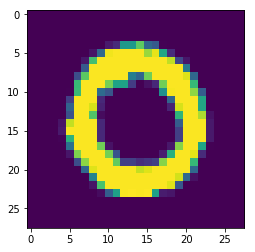

1


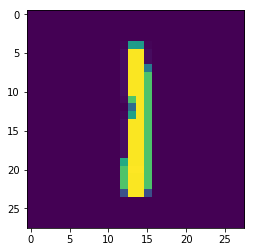

4


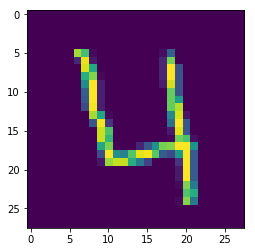

0


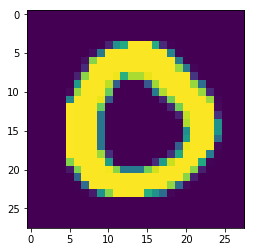

In [21]:
#Visualize the images of the first 5 digits in X - also print the class label in y
'''import matplotlib.pyplot as plt
for i in range(0,5):
    x=X[i]
    x.shape=(28,28)
    plt.imshow(255-x)
    print(Y[i])
    plt.show()'''
import matplotlib.pyplot as plt
for i in range(1,5):
    x=np.array(X.iloc[i,:])
    x.shape=(28,28)
    plt.imshow(x)
    print(Y[i])
    plt.show()

In [22]:
#Split the train dataset into training set (75%) and validation set(25%)
from sklearn.cross_validation import train_test_split as t
X_train,X_test,Y_train,Y_test=t(X,Y,test_size=0.25,random_state=1)

C:\Users\venu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
#Fit KNN classifier to the training data
#Default parameters - n_neighbors=5, metric = 'minkowski', p=2

from sklearn.neighbors import KNeighborsClassifier 
K=KNeighborsClassifier()
K.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
#Predict the validation set results
predict=K.predict(X_test)

In [25]:
#Print the confusion matrix
from sklearn.metrics import confusion_matrix as c
c(Y_test,predict)

array([[109,   0,   0,   1,   0,   0,   4,   0,   0,   0],
       [  0, 119,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   4, 107,   0,   0,   2,   0,   3,   2,   0],
       [  1,   2,   3,  83,   0,   3,   0,   0,   1,   0],
       [  0,   5,   0,   0,  92,   0,   2,   0,   0,   8],
       [  0,   0,   0,   4,   0,  86,   1,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0, 103,   0,   0,   0],
       [  0,   7,   0,   0,   0,   0,   0, 112,   0,   0],
       [  2,   5,   0,   6,   1,   4,   1,   0,  72,   1],
       [  1,   0,   0,   2,   2,   1,   0,   5,   0,  81]], dtype=int64)

In [26]:
# Printing classification report and accuracy
from sklearn.metrics import accuracy_score as a 
a(Y_test,predict)

from sklearn.metrics import classification_report as c
c(Y_test,predict)

'             precision    recall  f1-score   support\n\n          0       0.96      0.96      0.96       114\n          1       0.84      0.99      0.91       120\n          2       0.97      0.91      0.94       118\n          3       0.86      0.89      0.88        93\n          4       0.97      0.86      0.91       107\n          5       0.90      0.93      0.91        92\n          6       0.93      1.00      0.96       103\n          7       0.93      0.94      0.94       119\n          8       0.95      0.78      0.86        92\n          9       0.89      0.88      0.89        92\n\navg / total       0.92      0.92      0.92      1050\n'

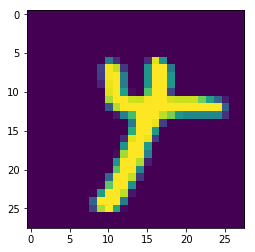

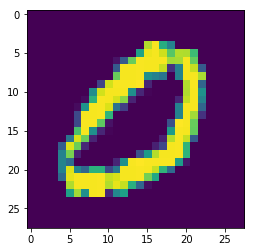

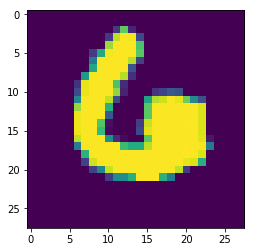

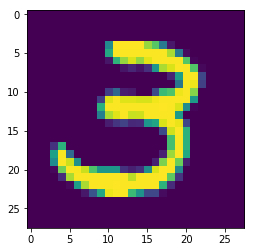

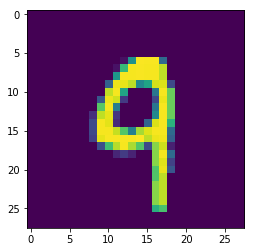

In [27]:
#Visualize the image of the first 5 digits in X_test - also print the predicted class label in y_pred
for i in range(0,5):
    x=np.array(X_test.iloc[i,:])
    x.shape=(28,28)
    plt.imshow(x)
    plt.show()

    

In [45]:
#Implement your own KNN classifier using Euclidean distance
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

import operator
class MyKNN:
    def __init__(self, n_neighbors):
        #Initialize
        self.k=n_neighbors
        
        
        
        
    def pred(self):
            l=[]
        #Make prediction
            for j in X_test:
                neighbours=self.get_neighbours(X_train,j)
                #print(type(neighbours))
                predicted=self.predicting(neighbours)
                
                
                
                
                
    def predicting(self,neighbours):
        dict1={}
        l=[]
        for i in range(len(neighbours)):
            print(neighbours[i])
            if(neighbours[i][0] in dict1):
                    dict1[neighbours[i][0]]=dict1[neighbours[i][0]]+1
            else:
                dict1[neighbours[i][0]]=1
        #sort=sorted(dict1.items(),key=operator.itemgetter(1))
        #print(sort)
        print(dict1)
        
        
            
        
    
        
            
                
                
    def get_neighbours(self,X_train,j):
        distance=[]
        for i in range (len(X_train)):
            dist=self.ED(X_train[i],j)
            distance.append((Y_train[i],dist))
        distance.sort(key=operator.itemgetter(1))
        
        Nbrs=[]
        for i in range(0,self.k):
            Nbrs.append(distance[i])
        return Nbrs
            
            
    
    def ED(self,i,j):
        dist=np.math.sqrt(sum((i-j)**2))
        return dist
                
            
        
knn=MyKNN(5)
knn.pred()

(9, 1596.292266472528)
(9, 1600.768877758435)
(1, 1625.7376787169571)
(1, 1633.4255416149217)
(1, 1644.2794774611766)
{9: 2, 1: 3}
(0, 1273.7947244356133)
(0, 1327.722109479239)
(0, 1444.4254913286459)
(0, 1460.0684915441468)
(0, 1521.7805360826508)
{0: 5}
(6, 1231.769458949198)
(6, 1638.0076312398548)
(6, 1783.2375052134812)
(6, 1817.3323856686206)
(6, 1824.2096918939994)
{6: 5}
(3, 1293.4024895599978)
(3, 1358.2731684017026)
(3, 1407.6640224144396)
(3, 1555.3096154785387)
(3, 1671.7996291422007)
{3: 5}
(9, 1099.16013392044)
(9, 1156.6377998319094)
(9, 1224.9016287033012)
(9, 1248.2744089341895)
(9, 1252.4795407510655)
{9: 5}
(6, 1378.6903205578838)
(6, 1434.296691762203)
(6, 1489.3451581148004)
(6, 1512.8436799616807)
(6, 1531.3376505526142)
{6: 5}
(1, 438.60346555858405)
(1, 516.7165567310574)
(1, 549.8054201260661)
(1, 564.885829172586)
(1, 678.4010613199246)
{1: 5}
(6, 1407.2636568887865)
(6, 1565.8346017379997)
(6, 1618.7109068638538)
(6, 1641.6756683340348)
(6, 1680.568356241423

(1, 484.0010330567488)
(1, 622.1703946669272)
(1, 711.5623655028419)
(1, 746.125994722071)
(1, 746.9672014218563)
{1: 5}
(5, 1689.6393106222404)
(5, 1897.949419768609)
(5, 1904.3670864620613)
(5, 1997.9044021173786)
(5, 2002.8479722634966)
{5: 5}
(4, 1605.187216495322)
(4, 1766.8276656199382)
(4, 1811.9737856823426)
(4, 1872.0149572052035)
(4, 1904.4416504582123)
{4: 5}
(5, 1693.80577398945)
(5, 1817.1177727379147)
(5, 1824.0849760907522)
(5, 1831.5717294171145)
(5, 1837.4825169236306)
{5: 5}
(5, 1542.062255552609)
(5, 1833.2471191849722)
(5, 1847.614678443533)
(5, 1885.9297441845495)
(0, 1889.0764939514756)
{5: 4, 0: 1}
(0, 1262.5545532768078)
(0, 1288.9453052786996)
(0, 1310.7917454729413)
(0, 1353.0687343960026)
(0, 1355.4718735554789)
{0: 5}
(1, 577.4131969395919)
(1, 618.4836295327468)
(1, 641.502922830442)
(1, 700.6218666299247)
(1, 710.2752987398618)
{1: 5}
(9, 1161.681970248312)
(9, 1230.9476024591786)
(9, 1241.0946780967197)
(9, 1346.5923659370715)
(9, 1394.154582533802)
{9: 5

KeyboardInterrupt: 

In [49]:
#Fit your model and make prediction
for i in Y_test:
    print(i)

4
0
6
3
9
6
1
6
5
7
9
6
5
9
5
1
2
2
3
5
1
6
0
0
7
7
4
7
8
8
3
2
2
4
7
7
0
0
2
2
4
7
2
7
3
4
8
3
5
6
7
8
1
2
1
0
4
4
9
7
9
4
4
2
2
1
5
4
5
5
0
1
9
3
8
6
1
7
7
2
0
9
0
8
7
1
4
2
9
2
2
1
8
0
6
1
4
9
2
0
6
1
6
0
8
2
0
6
5
2
6
1
6
0
9
7
4
0
7
2
4
4
1
4
9
4
2
9
8
7
3
4
1
9
1
0
1
3
0
3
3
7
4
6
4
2
8
2
4
6
5
5
2
5
3
2
6
4
5
8
1
6
0
1
6
5
2
9
1
8
5
8
8
3
3
2
7
5
3
9
8
7
5
5
3
9
0
5
9
9
3
2
5
5
1
9
9
2
4
2
8
0
7
0
7
7
7
5
2
6
4
7
7
0
3
5
8
3
1
8
8
0
5
5
6
3
3
7
7
2
3
0
0
4
4
0
8
0
9
7
2
4
0
0
5
1
8
3
6
7
3
7
1
0
9
7
2
5
0
0
8
7
3
6
4
9
8
7
8
6
7
1
4
6
2
6
6
5
1
9
2
4
1
8
0
3
6
3
1
6
0
2
3
0
7
5
3
9
4
8
7
3
2
8
6
1
9
9
8
7
1
0
6
5
1
5
6
7
7
7
7
1
6
3
0
1
8
6
5
9
5
6
7
2
5
0
5
9
3
7
2
8
6
1
9
9
4
7
4
4
4
0
3
4
7
4
1
0
2
5
2
8
3
0
2
9
2
7
8
5
2
2
0
8
5
2
3
1
6
4
1
6
5
1
7
2
4
1
1
7
0
1
0
2
7
7
9
7
2
3
5
1
9
0
4
9
2
0
3
7
2
0
8
1
1
7
0
0
0
5
8
2
8
2
3
5
3
2
8
2
9
3
1
2
1
1
7
3
8
2
2
2
8
8
4
2
4
8
1
4
2
4
4
2
3
5
2
7
6
2
8
5
0
2
9
2
3
7
0
9
1
4
4
4
6
9
8
8
7
8
7
8
0
9
7
7
3
6
7
1
0
7
8
6
5
5
5
0
8
7


In [185]:
import operator
dict2={'a':5,'b':2,'c':3}
k=sorted(dict2.items(),key=operator.itemgetter(1))
k

[('b', 2), ('c', 3), ('a', 5)]